# Obligatorio 1 - Algoritmos

Nombre del estudiante: Matias Iba;ez

Debajo de cada pregunta o tarea incluya las celdas necesarias para desarrollar la respuesta. Puede usar una o varias celdas de código o mark down (https://www.datacamp.com/community/tutorials/markdown-in-jupyter-notebook)

Para entregar, renombrar este notebook como "Obligatorio 1 - Apellido Nombre" 


## Problema 1
### Ejercicio 1
#### Parte a)
Implementar en python el binary search: busca un elemento en un arreglo/lista ordenado empezando por la mitad y descartando mitades). Implementar estos algoritmos en forma NO recursiva.

In [10]:
import time
def binary_search(elements: list[float], target: float) -> int:
    izq = 0
    der = len(elements) - 1
    while izq <= der:
        time.sleep(0.2)
        mitad = (izq + der) // 2
        # Si el elemento medio es el objetivo, devolver su índice
        if elements[mitad] == target:
            return mitad
        # Si el objetivo está en la mitad izquierda, ajustar el límite derecho
        elif elements[mitad] > target:
            der = mitad - 1
        # Si el objetivo está en la mitad derecha, ajustar el límite izquierdo
        else:
            izq = mitad + 1
    # Si el objetivo no está presente en la lista, devolver -1
    return -1


#### Parte b)
Implementar en python find_min (busca el mínimo elemento de un sub-arreglo/lista y retorna su índice).

In [3]:
def find_min(elements: list[float], from_index: int, to_index: int) -> int:
    minimo=None
    indice_buscado=-1
    for posicion in range(from_index,to_index):
        if( minimo == None or elements[posicion] < minimo ):
            minimo = elements[posicion]
            indice_buscado = posicion
    return indice_buscado

"""
def find_min(elements: list[float], from_index: int, to_index: int) -> int:
    indice_buscado=from_index
    for posicion in range(from_index+1,to_index):
        if(elements[posicion] < elements[indice_buscado] ):
            indice_buscado = posicion
    return indice_buscado
"""

'\ndef find_min(elements: list[float], from_index: int, to_index: int) -> int:\n    indice_buscado=from_index\n    for posicion in range(from_index+1,to_index):\n        if(elements[posicion] < elements[indice_buscado] ):\n            indice_buscado = posicion\n    return indice_buscado\n'

Al principio de cada iteracion del loop la variable indice_buscado contiene la posicion del menor elemento del subarray elementos[from_index:posicion-1]
Inicializacion: En la primera iteracion posicion = from_index+1 y indice_buscado = from_index y el minimo del subarray elementos[posicion:posicion] es from_index es decir el primer y unico valor de ese subarray.

Mantenimiento:Sabiendo que indice_buscado tiene el minimo desde elements[from_index:posicion-1] ==> el for pasa al siguiente elemento y si fija si es minimo o no si es cambio y si no sigue el que estaba antes por lo que el indice buscado

Terminacion:Suponiendo que hay un caso to_index+1 entonces al entrar al loop se que indice_buscado contiene la posicion del minimo del subarray elements[from_index:to_index] al finalizar el loop indice_buscado tiene la posicion del minimo buscado.

#### Parte c)
Implementar en python selection sort (ordena el arreglo empezando por buscar el mínimo e intercambiándolo por el del primer lugar, luego busca el mínimo del resto de la lista y lo intercambia
por el del segundo lugar, etc).

In [4]:
def selection_sort(elements: list[float]) -> list[float]:
    for i in range(len(elements)):
        posicion_minimo = find_min(elements,i,len(elements))
        aux=elements[i]
        elements[i]=elements[posicion_minimo]
        elements[posicion_minimo]=aux
    return elements





Loop invariant: A principio de cada iteracion, elements[0:i-1] va a estar ordenado

Inicializacion: Cuando i=0 elements[0:0] va a estar ordenada, ya que va a estar vacia

Mantenimiento: elements[0:i] va a estar ordenada porque cuando estoy parado en i, hago el find_min en elements[i:] y hago el swap, por lo tanto elements[0:i] van a estar ordenados

### Ejercicio 2
Crear Unit Tests para binary_search, fin_min, selection_stort
Implementar en python utilizando http://docs.python.org/2/library/unittest.html unit test para los tres algoritmos implementados.

In [5]:
import unittest

class TestBinarySearch(unittest.TestCase):
    def test_binary_search(self):
        # Caso de prueba con una lista desordenada
        lista_desordenada = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
        self.assertEqual(binary_search(lista_desordenada, 11), 5)

        # Caso de prueba con una lista vacía
        lista_vacia = []
        self.assertEqual(binary_search(lista_vacia, 5), -1)

        # Caso de prueba con una lista que no contiene el elemento buscado
        lista_no_contiene = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
        self.assertEqual(binary_search(lista_no_contiene, 6), -1)

        # Caso de prueba con una lista que contiene un solo elemento
        lista_un_elemento = [42]
        self.assertEqual(binary_search(lista_un_elemento, 42), 0)

        # Caso de prueba con una lista que contiene el mismo elemento repetido
        lista_repetidos = [7, 7, 7, 7, 7]
        self.assertEqual(binary_search(lista_repetidos, 7), 2)

        # Caso de prueba con una lista que contiene elementos negativos
        lista_negativos = [-5, -3, -1, 0, 2, 4, 6, 8]
        self.assertEqual(binary_search(lista_negativos, -1), 2)

        # Caso de prueba con una lista que contiene números flotantes
        lista_floats = [1.1, 2.2, 3.3, 4.4, 5.5]
        self.assertEqual(binary_search(lista_floats, 4.4), 3)

# Crear una instancia de la clase de prueba y ejecutar las pruebas
unittest.main(argv=[''], exit=False)


.
----------------------------------------------------------------------
Ran 1 test in 0.001s

OK


In [6]:
import unittest
class TestFindMin(unittest.TestCase):
    def test_find_min(self):
        # Caso de prueba con una lista desordenada
        lista_desordenada = [54, 23, 78, 12, 45, 87, 32, 65, 19, 90]
        indice_esperado_desordenado = 3
        self.assertEqual(find_min(lista_desordenada, 0, len(lista_desordenada)), indice_esperado_desordenado)

        # Caso de prueba con una lista vacía
        lista_vacia = []
        int_esperado = -1
        self.assertEqual(find_min(lista_vacia, 0, len(lista_vacia)), int_esperado)

        # Caso de prueba con una lista ya ordenada
        lista_ordenada = [1, 2, 3, 4, 5]
        indice_esperado_ordenado = 0
        self.assertEqual(find_min(lista_ordenada, 0, len(lista_ordenada)), indice_esperado_ordenado)

        # Caso de prueba con una lista inversamente ordenada
        lista_inversa = [5, 4, 3, 2, 1]
        indice_esperado_inverso = 4
        self.assertEqual(find_min(lista_inversa, 0, len(lista_inversa)), indice_esperado_inverso)

        # Caso de prueba con una lista que contiene elementos repetidos
        lista_repetidos = [7, 7, 7, 7, 7]
        indice_esperado_repetidos = 0
        self.assertEqual(find_min(lista_repetidos, 0, len(lista_repetidos)), indice_esperado_repetidos)

        # Caso de prueba con una lista que contiene elementos negativos
        lista_negativos = [-5, -3, -7, -2, -8]
        indice_esperado_negativos = 4
        self.assertEqual(find_min(lista_negativos, 0, len(lista_negativos)), indice_esperado_negativos)

# Crear una instancia de la clase de prueba y ejecutar las pruebas
unittest.main(argv=[''], exit=False)


..
----------------------------------------------------------------------
Ran 2 tests in 0.002s

OK


In [7]:
import unittest
class TestSelectionSort(unittest.TestCase):
    def test_selection_sort(self):
        # Caso de prueba con una lista desordenada
        lista_desordenada = [54, 23, 78, 12, 45, 87, 32, 65, 19, 90]
        resultado_esperado = [12, 19, 23, 32, 45, 54, 65, 78, 87, 90]
        self.assertEqual(selection_sort(lista_desordenada), resultado_esperado)

        # Caso de prueba con una lista vacía
        lista_vacia = []
        resultado_esperado_vacio = []
        self.assertEqual(selection_sort(lista_vacia), resultado_esperado_vacio)

        # Caso de prueba con una lista ya ordenada
        lista_ordenada = [1, 2, 3, 4, 5]
        resultado_esperado_ordenado = [1, 2, 3, 4, 5]
        self.assertEqual(selection_sort(lista_ordenada), resultado_esperado_ordenado)

        # Caso de prueba con una lista inversamente ordenada
        lista_inversa = [5, 4, 3, 2, 1]
        resultado_esperado_inverso = [1, 2, 3, 4, 5]
        self.assertEqual(selection_sort(lista_inversa), resultado_esperado_inverso)

        # Casos de prueba adicionales
        lista_un_elemento = [42]
        resultado_esperado = [42]
        self.assertEqual(selection_sort(lista_un_elemento), resultado_esperado)

        lista_repetidos = [7, 7, 7, 7, 7]
        resultado_esperado_repetidos = [7, 7, 7, 7, 7]
        self.assertEqual(selection_sort(lista_repetidos), resultado_esperado_repetidos)

        lista_negativos = [-5, -3, -7, -2, -8]
        resultado_esperado_negativos = [-8, -7, -5, -3, -2]
        self.assertEqual(selection_sort(lista_negativos), resultado_esperado_negativos)

# Crear una instancia de la clase de prueba y ejecutar las pruebas
unittest.main(argv=[''], exit=False)


...
----------------------------------------------------------------------
Ran 3 tests in 0.004s

OK


### Ejercicio 3
Usando matplotlib (https://jakevdp.github.io/PythonDataScienceHandbook/04.02-simple-scatter-plots.html) crear una gráfica con los tiempos de ejecución. 
Es decir computar la duración del algoritmo para distintos n (el tamaño del arreglo/lista). 
Tomar el máximo n suficientemente grande de tal forma que correr tome algunos minutos. Si fuera necesario, puede agregar sleep() junto a las instrucciones para enlentencer el procesamiento (https://www.programiz.com/python-programming/time/sleep)  



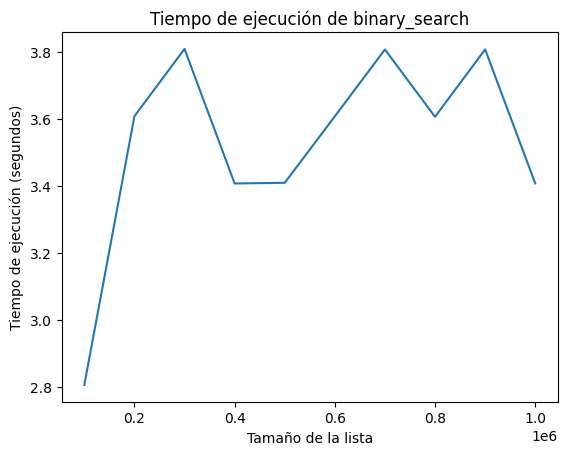

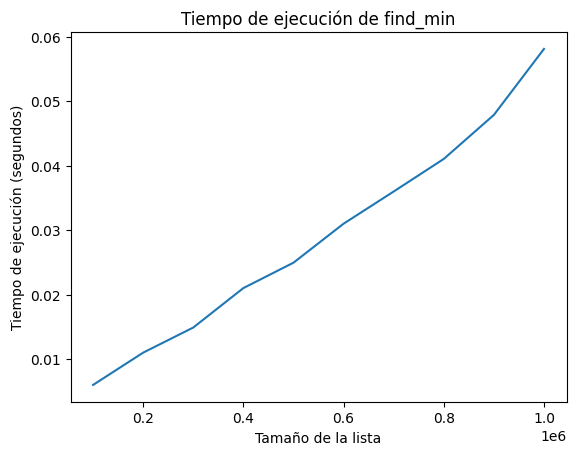

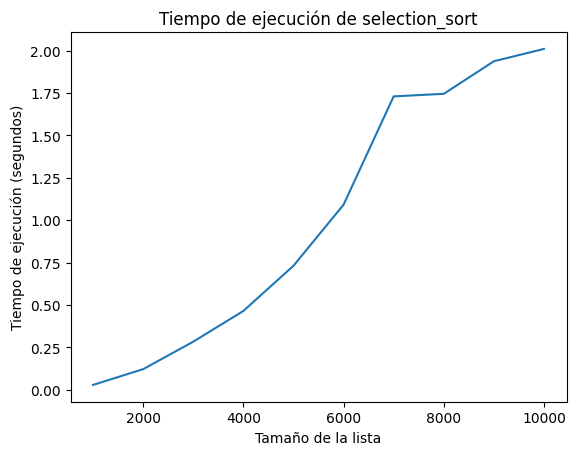

In [11]:
import time
import random
import matplotlib.pyplot as plt

def generate_random_list(size, min_val=0, max_val=100):
    return [random.uniform(min_val, max_val) for _ in range(size)]

sizes = [100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000]  # Tamaños de las listas

# -------  -------  -------  -------  -------  -------  -------  -------  -------  -------
# Graficar para binary_search
times_binary_search = []
for size in sizes:
    elements =[]
    for i in range(size):
        elements.append(i)
    # elements = [x for x in range(1, size)] # hay q ver q aca salga una lista ordenada
    start_time = time.time()
    binary_search(elements,random.choice(elements))
    end_time = time.time()
    times_binary_search.append(end_time - start_time)

plt.plot(sizes, times_binary_search)
plt.xlabel('Tamaño de la lista')
plt.ylabel('Tiempo de ejecución (segundos)')
plt.title('Tiempo de ejecución de binary_search')
plt.show()

# -------  -------  -------  -------  -------  -------  -------  -------  -------  -------
# Graficar para find_min
times_find_min = []
for size in sizes:
    elements = generate_random_list(size)
    start_time = time.time()
    find_min(elements, 0, len(elements))
    end_time = time.time()
    times_find_min.append(end_time - start_time)

plt.plot(sizes, times_find_min)
plt.xlabel('Tamaño de la lista')
plt.ylabel('Tiempo de ejecución (segundos)')
plt.title('Tiempo de ejecución de find_min')
plt.show()

# -------  -------  -------  -------  -------  -------  -------  -------  -------  -------
# Graficar para selection_sort
sizes = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]  # Tamaños de las listas
times_selection_sort = []
for size in sizes:
    elements = generate_random_list(size)
    start_time = time.time()
    selection_sort(elements.copy())
    end_time = time.time()
    times_selection_sort.append(end_time - start_time)

plt.plot(sizes, times_selection_sort)
plt.xlabel('Tamaño de la lista')
plt.ylabel('Tiempo de ejecución (segundos)')
plt.title('Tiempo de ejecución de selection_sort')
plt.show()


## Problema 2
Utilizar Latex y Markdowns para la notación matemática.
1. Dar una prueba para selection sort implementado en el Problema 1. 
2. Encontrar la función de tiempo (peor caso) para el selection sort dando también el órden de crecimiento (big-O)
3. Dar una prueba para binary search implementado en el Problema 1. 
4. Encontrar la función de tiempo (peor caso) para el binary search  dando también el órden de crecimiento (big-O)

## Problema 3
Resolver el problema 2-4 de CLRS




### a)
posicion=[1,2,3,4,5]
array=    [2,3,8,6,1]

1. [1] --> [5]
2. [2] --> [5]
3. [3] --> [5]
4. [4] --> [5]
5. [3] --> [4]

Inversiones= [<1,5>,<2,5>,<3,5>,<4,5>,<3,4>]

### b)

El array con mas inversiones seria el array que va desde n hasta el 1  [n,n-1,n-2....,2,1] ya que <n,n-1> sera una inversion <n,n-2> asi sucesivamente hasta <n,1> tambien <n-1,n-2> seran inversiones y igual que con n sucesivamente hasta el 1 tambien. Entonces la cantidad total de inversiones seria una sumatoria de 1 a n de n-i 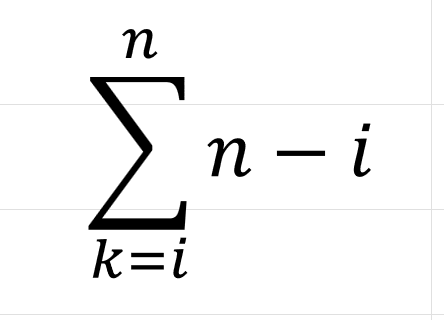 utilizando Gauss y un poco de conocimientos de  matematica discreta la n es una constante por lo que se saca y el menos tambien entonces queda 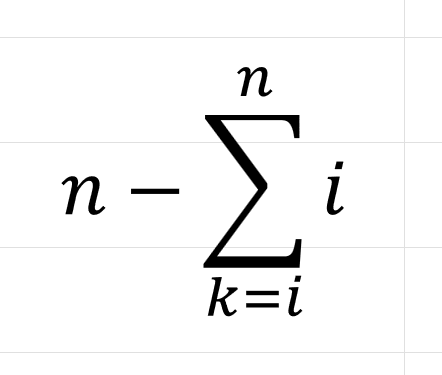 y tambien sabiendo que la sumatoria de i desde 1 hasta n es n(n+1)/2 entonces nos queda un total de n^2/2-n/2

### d)
